In [1]:
import sqlite3 #importing sqlite3 to perform sql functions on the database
import matplotlib.pyplot as plt #matplotlib.pyplot offers 

In [2]:
con=sqlite3.connect("hospital.db")

In [ ]:
con.execute("""CREATE TABLE appointments (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    doctor_id INTEGER,
    date_time DATETIME,
    FOREIGN KEY (user_id) REFERENCES users(id),
    FOREIGN KEY (doctor_id) REFERENCES doctors(id)
);
""")

In [ ]:
con.execute("""CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT
);
""")

In [ ]:
con.execute("""CREATE TABLE doctors (
    id INTEGER PRIMARY KEY,
    name TEXT,
    specialty TEXT,
    hospital_id INTEGER,
    FOREIGN KEY (hospital_id) REFERENCES hospitals(id)
);
""")

In [ ]:
con.execute("""CREATE TABLE hospitals (
    id INTEGER PRIMARY KEY,
    name TEXT,
    location TEXT
);
""")

In [3]:
con.execute("select * from hospitals").fetchall()

[(1, 'Apollo Hospital', 'New Delhi'),
 (2, 'Fortis Hospital', 'Mumbai'),
 (3, 'Max Super Speciality Hospital', 'Bangalore'),
 (4, 'AIIMS Hospital', 'Delhi'),
 (5, 'Columbia Asia Hospital', 'Kolkata'),
 (6, 'Ruby Hall Clinic', 'Pune'),
 (7, 'Care Hospital', 'Hyderabad'),
 (8, 'Wockhardt Hospital', 'Mumbai'),
 (9, 'Lilavati Hospital', 'Mumbai'),
 (10, 'Global Hospital', 'Chennai'),
 (11, 'Manipal Hospital', 'Bangalore'),
 (12, 'Medanta - The Medicity', 'Gurgaon'),
 (13, 'Nanavati Super Speciality Hospital', 'Mumbai'),
 (14, 'Artemis Hospital', 'Gurgaon'),
 (15, 'Sir Ganga Ram Hospital', 'New Delhi'),
 (16, 'Indraprastha Apollo Hospital', 'New Delhi'),
 (17, 'Kokilaben Dhirubhai Ambani Hospital', 'Mumbai'),
 (18, 'Asian Heart Institute', 'Mumbai'),
 (19, 'Aster Medcity', 'Kochi'),
 (20, 'Sri Ramachandra Medical Centre', 'Chennai')]

In [4]:
con.execute("select * from doctors").fetchall()

[(1, 'Dr. Ananya Sharma', 'Cardiologist', 1),
 (2, 'Dr. Rohit Patel', 'Neurologist', 2),
 (3, 'Dr. Priya Singh', 'Pediatrician', 3),
 (4, 'Dr. Akash Gupta', 'Orthopedic Surgeon', 1),
 (5, 'Dr. Nisha Reddy', 'Gynecologist', 2),
 (6, 'Dr. Vikram Verma', 'Dermatologist', 3),
 (7, 'Dr. Manoj Kumar', 'Cardiologist', 4),
 (8, 'Dr. Neha Singh', 'Neurologist', 5),
 (9, 'Dr. Sanjay Sharma', 'Pediatrician', 6),
 (10, 'Dr. Prakash Jain', 'Orthopedic Surgeon', 4),
 (11, 'Dr. Anjali Gupta', 'Gynecologist', 5),
 (12, 'Dr. Mohan Rao', 'Dermatologist', 6),
 (13, 'Dr. Ravi Verma', 'Cardiologist', 7),
 (14, 'Dr. Swati Shah', 'Neurologist', 8),
 (15, 'Dr. Deepika Singh', 'Pediatrician', 9),
 (16, 'Dr. Rajiv Kumar', 'Orthopedic Surgeon', 7),
 (17, 'Dr. Meena Sharma', 'Gynecologist', 8),
 (18, 'Dr. Ramesh Patel', 'Dermatologist', 9),
 (19, 'Dr. Sunil Kumar', 'Cardiologist', 10),
 (20, 'Dr. Pooja Gupta', 'Neurologist', 11),
 (21, 'Dr. Prasad Singh', 'Pediatrician', 12),
 (22, 'Dr. Komal Jain', 'Orthopedic S

In [5]:
cur = con.cursor()

In [6]:
# Count the number of appointments
cur.execute("SELECT COUNT(*) FROM appointments")
total_appointments = cur.fetchone()[0]
print("Total Appointments:", total_appointments)

Total Appointments: 447


In [7]:
# Count the number of appointments for each user
cur.execute("""SELECT users.id, users.name, COUNT(appointments.id) AS num_appointments
               FROM users
               LEFT JOIN appointments ON users.id = appointments.user_id
               GROUP BY users.id""")
user_appointments = cur.fetchall()
print("\nUser Appointments:")
for user in user_appointments:
    print(user)


User Appointments:
(1, 'K N Thushaar Rangan ', 1)
(2, 'amogh ', 1)
(3, 'Nidhi Nair', 1)
(4, 'Amogh P', 1)
(5, "Trisha Hansen D'Souza", 1)
(6, 'Nagashree A R', 1)
(7, 'Amogh anil', 1)
(8, 'Aarav Patel', 1)
(9, 'Anaya Singh', 1)
(10, 'Aditi Reddy', 1)
(11, 'Aryan Gupta', 1)
(12, 'Aisha Sharma', 1)
(13, 'Arjun Kumar', 1)
(14, 'Bhavya Desai', 1)
(15, 'Bharat Shah', 1)
(16, 'Chetna Mehta', 1)
(17, 'Devansh Rao', 1)
(18, 'Deepika Nair', 1)
(19, 'Dhruv Joshi', 1)
(20, 'Esha Khanna', 1)
(21, 'Gaurav Sharma', 1)
(22, 'Gayatri Patel', 1)
(23, 'Harshini Menon', 1)
(24, 'Ishaan Agarwal', 1)
(25, 'Ishita Choudhary', 1)
(26, 'Jay Patel', 1)
(27, 'Jasmine Kaur', 1)
(28, 'Kabir Mishra', 1)
(29, 'Kavita Reddy', 1)
(30, 'Krishna Shah', 1)
(31, 'Lakshmi Iyer', 1)
(32, 'Manish Tiwari', 1)
(33, 'Maya Naidu', 1)
(34, 'Neha Singh', 1)
(35, 'Nikhil Chatterjee', 1)
(36, 'Nisha Menon', 1)
(37, 'Omkar Rao', 1)
(38, 'Pooja Gupta', 1)
(39, 'Pranav Patel', 1)
(40, 'Priya Das', 1)
(41, 'Rahul Sharma', 1)
(42, 'Riya

In [8]:
# Count the number of appointments for each doctor
cur.execute("""SELECT doctors.id, doctors.name, COUNT(appointments.id) AS num_appointments
               FROM doctors
               LEFT JOIN appointments ON doctors.id = appointments.doctor_id
               GROUP BY doctors.id""")
doctor_appointments = cur.fetchall()
print("\nDoctor Appointments:")
for doctor in doctor_appointments:
    print(doctor)


Doctor Appointments:
(1, 'Dr. Ananya Sharma', 17)
(2, 'Dr. Rohit Patel', 14)
(3, 'Dr. Priya Singh', 13)
(4, 'Dr. Akash Gupta', 13)
(5, 'Dr. Nisha Reddy', 15)
(6, 'Dr. Vikram Verma', 15)
(7, 'Dr. Manoj Kumar', 12)
(8, 'Dr. Neha Singh', 12)
(9, 'Dr. Sanjay Sharma', 12)
(10, 'Dr. Prakash Jain', 12)
(11, 'Dr. Anjali Gupta', 10)
(12, 'Dr. Mohan Rao', 11)
(13, 'Dr. Ravi Verma', 11)
(14, 'Dr. Swati Shah', 12)
(15, 'Dr. Deepika Singh', 9)
(16, 'Dr. Rajiv Kumar', 12)
(17, 'Dr. Meena Sharma', 11)
(18, 'Dr. Ramesh Patel', 10)
(19, 'Dr. Sunil Kumar', 11)
(20, 'Dr. Pooja Gupta', 10)
(21, 'Dr. Prasad Singh', 11)
(22, 'Dr. Komal Jain', 12)
(23, 'Dr. Anushka Sharma', 9)
(24, 'Dr. Rahul Verma', 9)
(25, 'Dr. Amit Kumar', 9)
(26, 'Dr. Sunita Singh', 9)
(27, 'Dr. Ritu Gupta', 10)
(28, 'Dr. Arun Patel', 10)
(29, 'Dr. Kavita Sharma', 10)
(30, 'Dr. Siddharth Verma', 11)
(31, 'Dr. Rajesh Singh', 9)
(32, 'Dr. Priyanka Patel', 9)
(33, 'Dr. Neha Verma', 7)
(34, 'Dr. Anil Gupta', 8)
(35, 'Dr. Deepa Sharma', 10)


In [9]:
# Count the number of appointments for each hospital
cur.execute("""SELECT hospitals.id, hospitals.name, COUNT(appointments.id) AS num_appointments
               FROM hospitals
               LEFT JOIN doctors ON hospitals.id = doctors.hospital_id
               LEFT JOIN appointments ON doctors.id = appointments.doctor_id
               GROUP BY hospitals.id""")
hospital_appointments = cur.fetchall()
print("\nHospital Appointments:")
for hospital in hospital_appointments:
    print(hospital)


Hospital Appointments:
(1, 'Apollo Hospital', 30)
(2, 'Fortis Hospital', 29)
(3, 'Max Super Speciality Hospital', 28)
(4, 'AIIMS Hospital', 24)
(5, 'Columbia Asia Hospital', 22)
(6, 'Ruby Hall Clinic', 23)
(7, 'Care Hospital', 23)
(8, 'Wockhardt Hospital', 23)
(9, 'Lilavati Hospital', 19)
(10, 'Global Hospital', 23)
(11, 'Manipal Hospital', 19)
(12, 'Medanta - The Medicity', 20)
(13, 'Nanavati Super Speciality Hospital', 19)
(14, 'Artemis Hospital', 19)
(15, 'Sir Ganga Ram Hospital', 21)
(16, 'Indraprastha Apollo Hospital', 17)
(17, 'Kokilaben Dhirubhai Ambani Hospital', 19)
(18, 'Asian Heart Institute', 17)
(19, 'Aster Medcity', 26)
(20, 'Sri Ramachandra Medical Centre', 26)


In [10]:
# Find the busiest day/time for appointments (assuming date_time is in DATETIME format)
cur.execute("""SELECT strftime('%Y-%m-%d %H:%M', date_time) AS appointment_time, COUNT(id) AS num_appointments
               FROM appointments
               GROUP BY appointment_time
               ORDER BY num_appointments DESC
               LIMIT 1""")
busiest_time = cur.fetchone()
print("\nBusiest Time for Appointments:", busiest_time[0], "- Number of Appointments:", busiest_time[1])


Busiest Time for Appointments: 2024-05-06 22:00 - Number of Appointments: 107


In [11]:

# Find the most popular specialty
cur.execute("""SELECT specialty, COUNT(doctors.id) AS num_doctors
               FROM doctors
               GROUP BY specialty
               ORDER BY num_doctors DESC
               LIMIT 1""")
most_popular_specialty = cur.fetchone()
print("\nMost Popular Specialty:", most_popular_specialty[0], "- Number of Doctors:", most_popular_specialty[1])


Most Popular Specialty: Pediatrician - Number of Doctors: 7


In [12]:
# Join appointments with users to get user details
cur.execute("""SELECT appointments.id, appointments.date_time, users.name AS user_name, users.email AS user_email
               FROM appointments
               INNER JOIN users ON appointments.user_id = users.id""")
appointments_with_users = cur.fetchall()
print("Appointments with User Details:")
for appointment in appointments_with_users:
    print(appointment)

Appointments with User Details:
(1, '2024-05-06T22:00', 'K N Thushaar Rangan ', 'thushaarrangan@gmail.com')
(2, '2024-05-06T11:00', 'amogh ', 'amoghprashanth156@gmail.com')
(3, '2024-05-07T12:00', 'Nidhi Nair', 'nidhic1d27@gmail.com')
(4, '2024-05-11T22:59', 'Amogh P', 'amoghp102@gmail.com')
(5, '2024-05-09T23:30', "Trisha Hansen D'Souza", 'trisha.kanyewest@gmail.com')
(6, '2024-05-07T12:00', 'Nagashree A R', 'thushaarrangan1982@gmail.com')
(7, '2024-05-09T13:45', 'Amogh anil', 'abcd@gmail.com')
(8, '2024-05-10 09:00:00', 'Aarav Patel', 'aarav.pat@gmail.com')
(9, '2024-05-11 10:30:00', 'Anaya Singh', 'anaya.singh@gmail.com')
(10, '2024-05-12 11:00:00', 'Aditi Reddy', 'aditi.reddy@gmail.com')
(11, '2024-05-13 13:15:00', 'Aryan Gupta', 'aryan.gupta@gmail.com')
(12, '2024-05-14 15:45:00', 'Aisha Sharma', 'aisha.sharma@gmail.com')
(13, '2024-05-15 08:30:00', 'Arjun Kumar', 'arjun.kumar@gmail.com')
(14, '2024-05-16 09:30:00', 'Bhavya Desai', 'bhavya.desai@gmail.com')
(15, '2024-05-17 10:45:

In [13]:

# Join appointments with doctors to get doctor details
cur.execute("""SELECT appointments.id, appointments.date_time, doctors.name AS doctor_name, doctors.specialty, hospitals.name AS hospital_name
               FROM appointments
               INNER JOIN doctors ON appointments.doctor_id = doctors.id
               INNER JOIN hospitals ON doctors.hospital_id = hospitals.id""")
appointments_with_doctors = cur.fetchall()
print("\nAppointments with Doctor Details:")
for appointment in appointments_with_doctors:
    print(appointment)


Appointments with Doctor Details:
(1, '2024-05-06T22:00', 'Dr. Ananya Sharma', 'Cardiologist', 'Apollo Hospital')
(2, '2024-05-06T11:00', 'Dr. Komal Jain', 'Orthopedic Surgeon', 'Global Hospital')
(3, '2024-05-07T12:00', 'Dr. Nisha Reddy', 'Gynecologist', 'Fortis Hospital')
(4, '2024-05-11T22:59', 'Dr. Rajiv Kumar', 'Orthopedic Surgeon', 'Care Hospital')
(5, '2024-05-09T23:30', 'Dr. Ananya Sharma', 'Cardiologist', 'Apollo Hospital')
(6, '2024-05-07T12:00', 'Dr. Siddharth Verma', 'Dermatologist', 'Sir Ganga Ram Hospital')
(7, '2024-05-09T13:45', 'Dr. Anushka Sharma', 'Gynecologist', 'Manipal Hospital')
(8, '2024-05-10 09:00:00', 'Dr. Ananya Sharma', 'Cardiologist', 'Apollo Hospital')
(9, '2024-05-11 10:30:00', 'Dr. Rohit Patel', 'Neurologist', 'Fortis Hospital')
(10, '2024-05-12 11:00:00', 'Dr. Priya Singh', 'Pediatrician', 'Max Super Speciality Hospital')
(11, '2024-05-13 13:15:00', 'Dr. Akash Gupta', 'Orthopedic Surgeon', 'Apollo Hospital')
(12, '2024-05-14 15:45:00', 'Dr. Nisha Redd

In [14]:

# Join doctors with hospitals to get hospital details
cur.execute("""SELECT doctors.name AS doctor_name, doctors.specialty, hospitals.name AS hospital_name, hospitals.location
               FROM doctors
               INNER JOIN hospitals ON doctors.hospital_id = hospitals.id""")
doctors_with_hospitals = cur.fetchall()
print("\nDoctors with Hospital Details:")
for doctor in doctors_with_hospitals:
    print(doctor)


Doctors with Hospital Details:
('Dr. Ananya Sharma', 'Cardiologist', 'Apollo Hospital', 'New Delhi')
('Dr. Rohit Patel', 'Neurologist', 'Fortis Hospital', 'Mumbai')
('Dr. Priya Singh', 'Pediatrician', 'Max Super Speciality Hospital', 'Bangalore')
('Dr. Akash Gupta', 'Orthopedic Surgeon', 'Apollo Hospital', 'New Delhi')
('Dr. Nisha Reddy', 'Gynecologist', 'Fortis Hospital', 'Mumbai')
('Dr. Vikram Verma', 'Dermatologist', 'Max Super Speciality Hospital', 'Bangalore')
('Dr. Manoj Kumar', 'Cardiologist', 'AIIMS Hospital', 'Delhi')
('Dr. Neha Singh', 'Neurologist', 'Columbia Asia Hospital', 'Kolkata')
('Dr. Sanjay Sharma', 'Pediatrician', 'Ruby Hall Clinic', 'Pune')
('Dr. Prakash Jain', 'Orthopedic Surgeon', 'AIIMS Hospital', 'Delhi')
('Dr. Anjali Gupta', 'Gynecologist', 'Columbia Asia Hospital', 'Kolkata')
('Dr. Mohan Rao', 'Dermatologist', 'Ruby Hall Clinic', 'Pune')
('Dr. Ravi Verma', 'Cardiologist', 'Care Hospital', 'Hyderabad')
('Dr. Swati Shah', 'Neurologist', 'Wockhardt Hospital', '

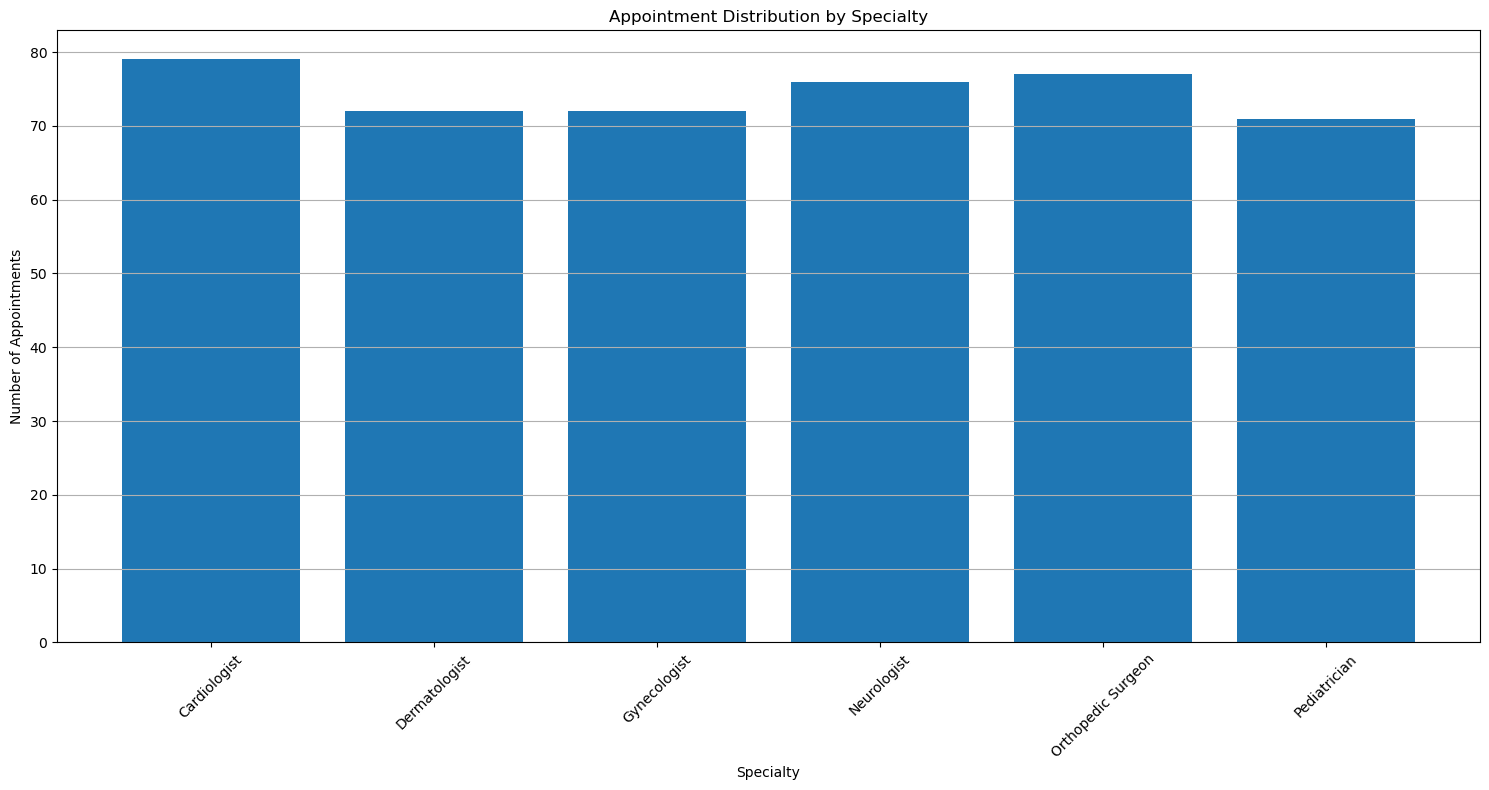

In [15]:
# Analyze appointment distribution by specialty
cur.execute("""SELECT specialty, COUNT(*) AS num_appointments
               FROM appointments
               INNER JOIN doctors ON appointments.doctor_id = doctors.id
               GROUP BY specialty""")
appointment_distribution = cur.fetchall()
specialties, num_appointments = zip(*appointment_distribution)

plt.figure(figsize=(15, 8))
plt.bar(specialties, num_appointments)
plt.title('Appointment Distribution by Specialty')
plt.xlabel('Specialty')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

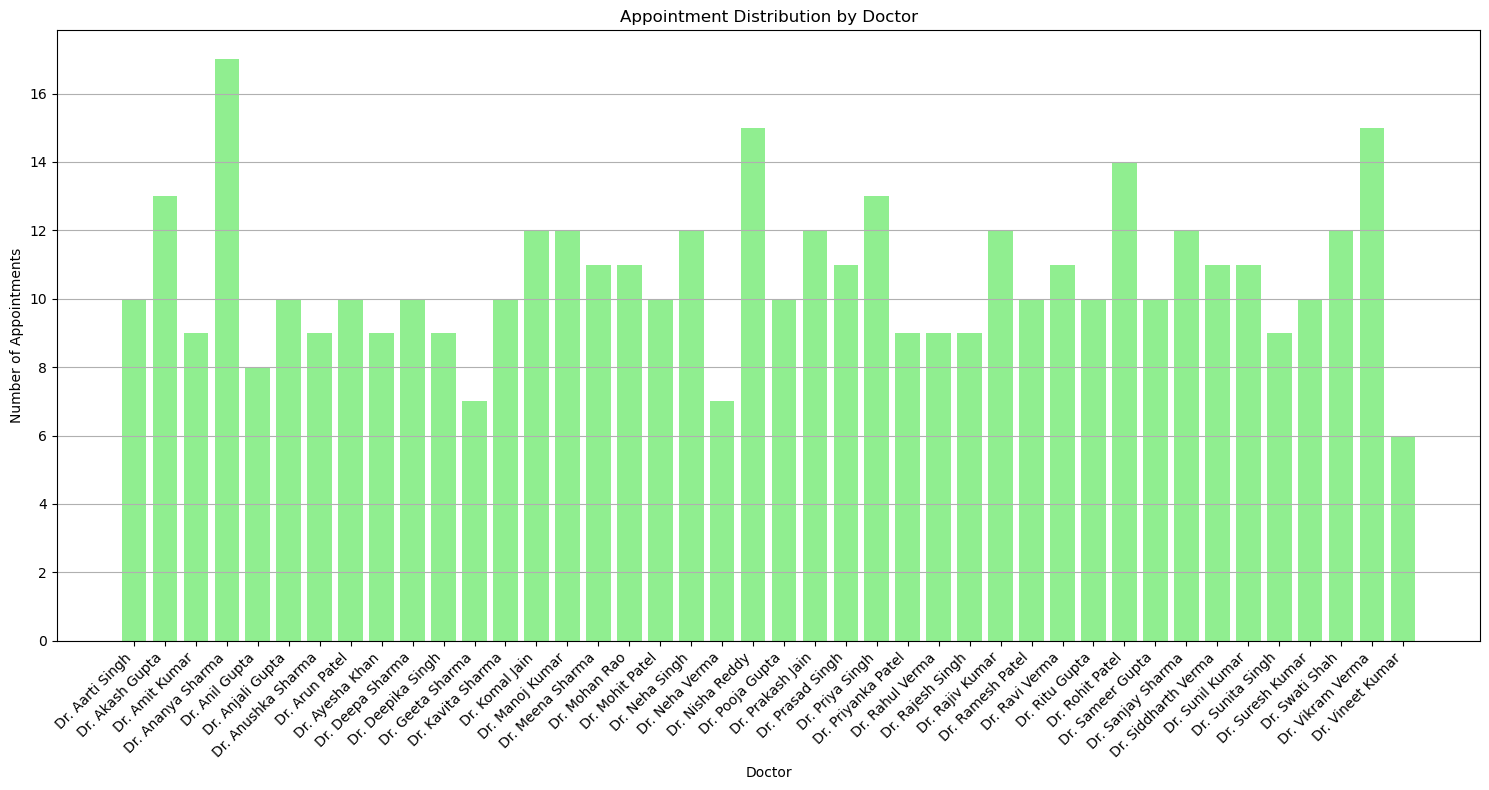

In [16]:
# Analyze appointment distribution by doctor
cur.execute("""SELECT doctors.name, COUNT(*) AS num_appointments
               FROM appointments
               INNER JOIN doctors ON appointments.doctor_id = doctors.id
               GROUP BY doctors.name""")
appointment_distribution = cur.fetchall()
doctors, num_appointments = zip(*appointment_distribution)

plt.figure(figsize=(15, 8))
plt.bar(doctors, num_appointments, color='lightgreen')
plt.title('Appointment Distribution by Doctor')
plt.xlabel('Doctor')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

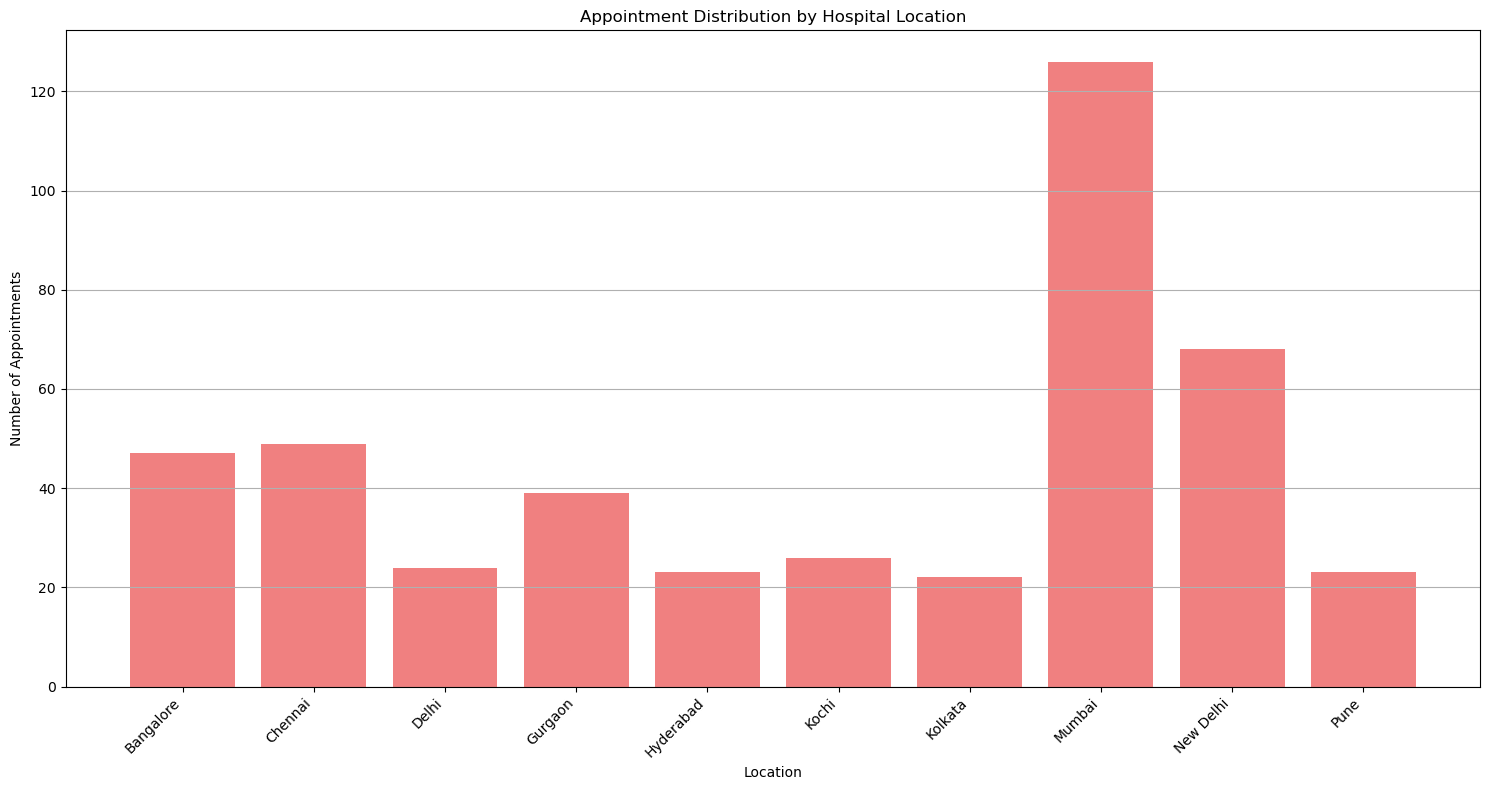

In [17]:
# Analyze appointment distribution by hospital location
cur.execute("""SELECT hospitals.location, COUNT(*) AS num_appointments
               FROM appointments
               INNER JOIN doctors ON appointments.doctor_id = doctors.id
               INNER JOIN hospitals ON doctors.hospital_id = hospitals.id
               GROUP BY hospitals.location""")
appointment_distribution = cur.fetchall()
locations, num_appointments = zip(*appointment_distribution)

plt.figure(figsize=(15, 8))
plt.bar(locations, num_appointments, color='lightcoral')
plt.title('Appointment Distribution by Hospital Location')
plt.xlabel('Location')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


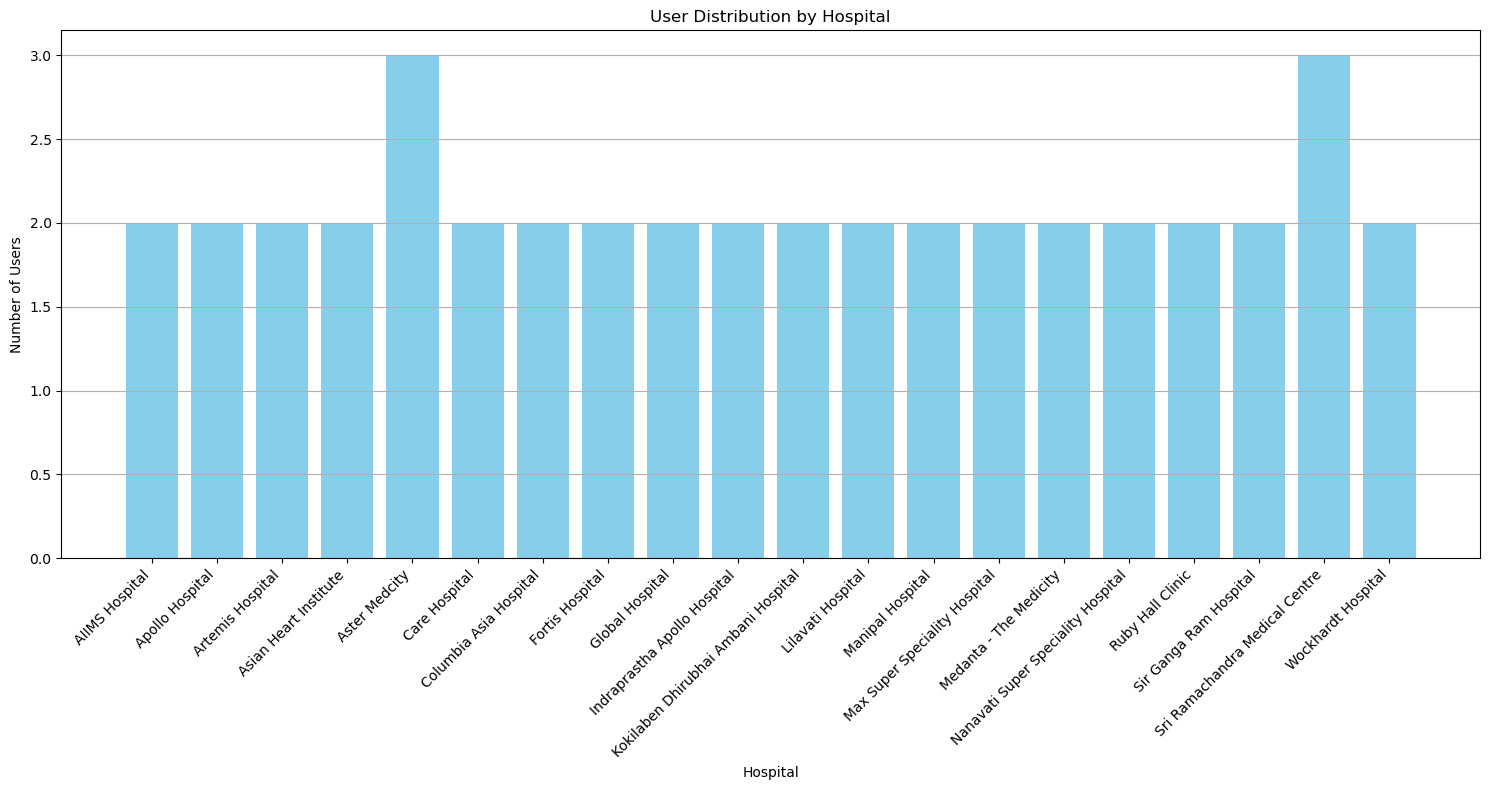

In [18]:
# Analyze user distribution by hospital
cur.execute("""SELECT hospitals.name, COUNT(*) AS num_users
               FROM users
               INNER JOIN doctors ON users.id = doctors.id
               INNER JOIN hospitals ON doctors.hospital_id = hospitals.id
               GROUP BY hospitals.name""")
user_distribution = cur.fetchall()
hospitals, num_users = zip(*user_distribution)

plt.figure(figsize=(15, 8))
plt.bar(hospitals, num_users, color='skyblue')
plt.title('User Distribution by Hospital')
plt.xlabel('Hospital')
plt.ylabel('Number of Users')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


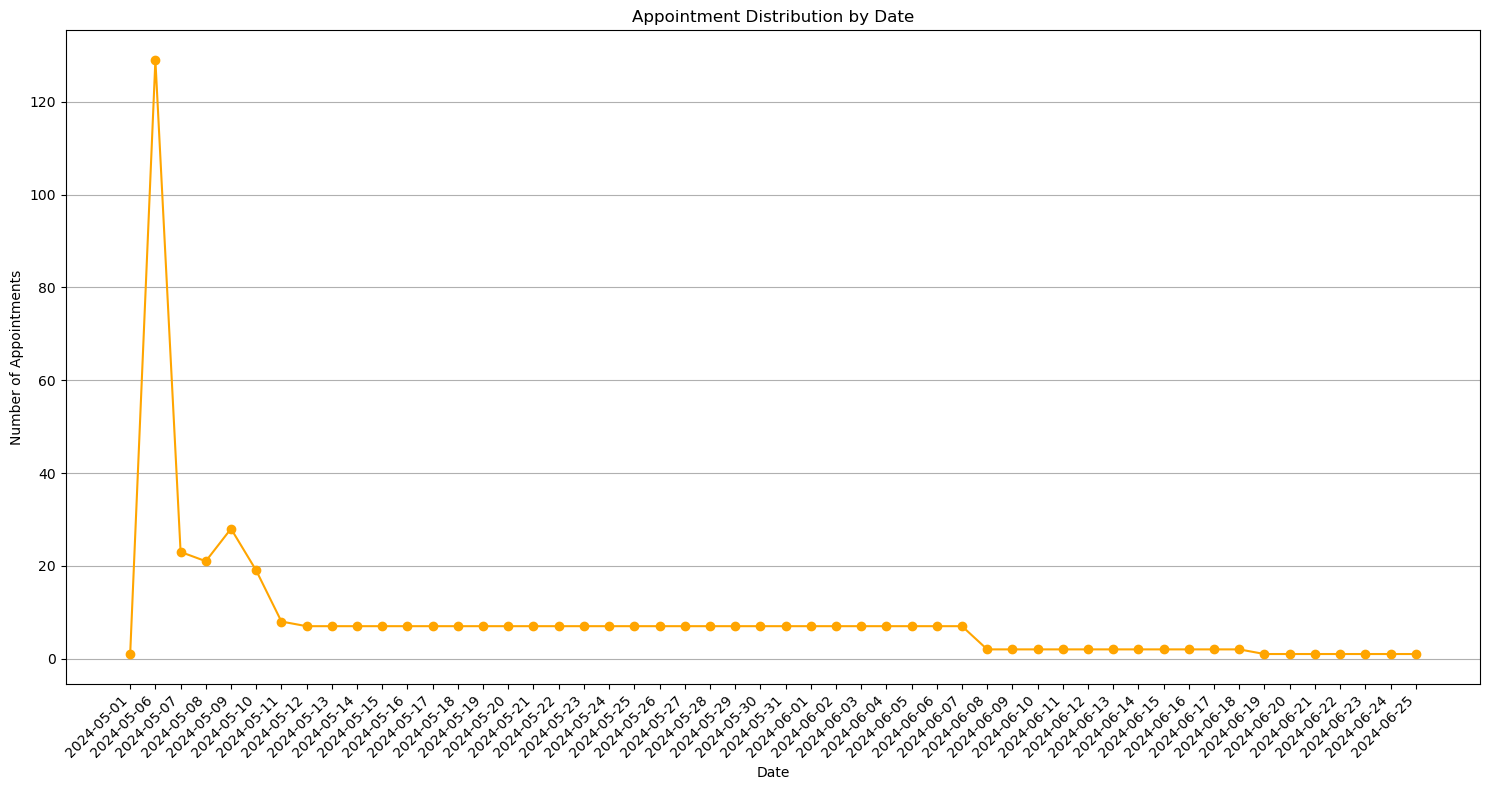

In [19]:
# Analyze appointment distribution by date
cur.execute("""SELECT DATE(date_time) AS appointment_date, COUNT(*) AS num_appointments
               FROM appointments
               GROUP BY appointment_date""")
appointment_distribution = cur.fetchall()
dates, num_appointments = zip(*appointment_distribution)

plt.figure(figsize=(15, 8))
plt.plot(dates, num_appointments, marker='o', color='orange')
plt.title('Appointment Distribution by Date')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

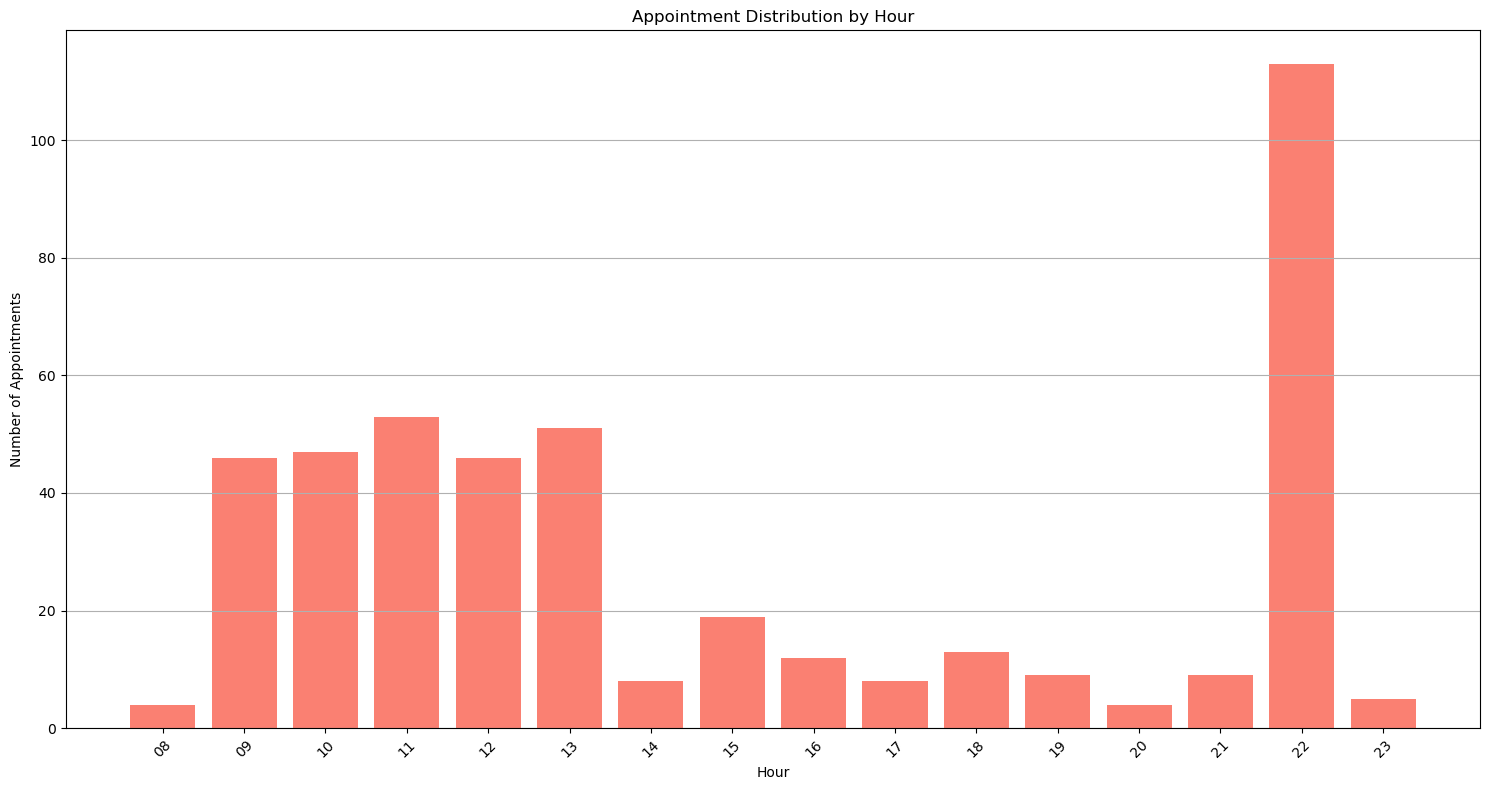

In [20]:
# Analyze appointment distribution by hour
cur.execute("""SELECT strftime('%H', date_time) AS appointment_hour, COUNT(*) AS num_appointments
               FROM appointments
               GROUP BY appointment_hour""")
appointment_distribution = cur.fetchall()
hours, num_appointments = zip(*appointment_distribution)

plt.figure(figsize=(15, 8))
plt.bar(hours, num_appointments, color='salmon')
plt.title('Appointment Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
